In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from imutils.video import count_frames
from imutils import paths
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import os
import json

In [ ]:
def dhash(image, hashSize=8):
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	resized = cv2.resize(gray, (hashSize + 1, hashSize))

	diff = resized[:, 1:] > resized[:, :-1]

	return sum([2 ** i for (i, v) in enumerate(diff.flatten()) if v])

In [ ]:
path = "/content/drive/My Drive/Coding/videos"
onlyfiles = [join(path,f) for f in listdir(path) if isfile(join(path, f))]
print(onlyfiles)

['/content/drive/My Drive/Coding/videos/matrix.mp4', '/content/drive/My Drive/Coding/videos/matrix1.mp4', '/content/drive/My Drive/Coding/videos/f1.mp4']


In [ ]:
def makeBarcode(path, override = False, skip = 25, width = 5, height = 250):

  total = count_frames(path, override=override)
  avgs = []
  read = 0

  print("[INFO] looping over frames in video")
  video = cv2.VideoCapture(path)

  while True:
	  (grabbed, frame) = video.read()
 
	  if not grabbed:
		  break

	  read += 1

	  if skip == 0 or read % skip == 0:
		  avg = cv2.mean(frame)[:3]
		  avgs.append(avg)

  video.release()

  avgs = np.array(avgs, dtype="int")

  bw = width
  barcode = np.zeros((height, len(avgs)*bw, 3), dtype='uint8')

  for (i, avg) in enumerate(avgs):
    start = (i*bw,0)
    end = (i*bw+bw, height)
    cv2.rectangle(barcode, start, end, avg.astype("uint8").tolist(), -1)

  return barcode

[INFO] looping over frames in video


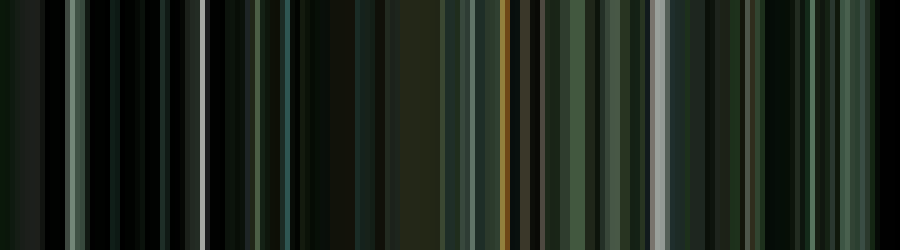

[INFO] looping over frames in video


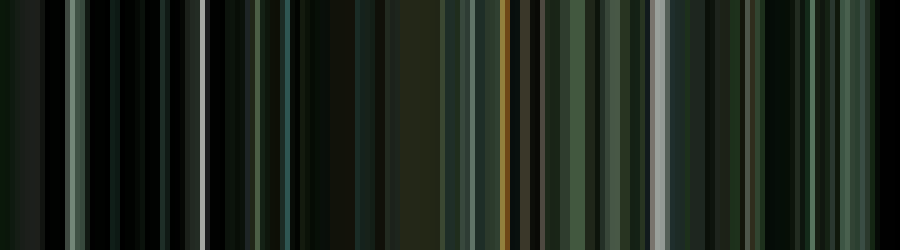

[INFO] looping over frames in video


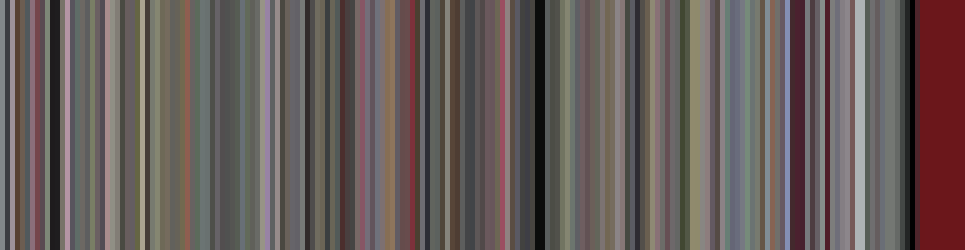

In [ ]:
videoPaths = [join(path,f) for f in listdir(path) if isfile(join(path, f))]

for videoPath in videoPaths:
  barcode = makeBarcode(videoPath)
  
  filename=os.path.basename(os.path.splitext(videoPath)[0])
  output = "/content/drive/My Drive/Coding/output/images/" + filename + ".png"
  
  cv2.imwrite(output, barcode)
  cv2_imshow(barcode)


In [ ]:
dataset = "/content/drive/My Drive/Coding/output/images"

hashes = {}
imagePaths = list(paths.list_images(dataset))

for imagePath in imagePaths:
	image = cv2.imread(imagePath)
	h = dhash(image)

	p = hashes.get(h, [])
	p.append(imagePath)
	hashes[h] = p

In [ ]:
remove = 1 #positive for removal

for (h, hashedPaths) in hashes.items():
  if len(hashedPaths) > 1:
    if remove <= 0:
      montage = None

      for p in hashedPaths:
        image = cv2.imread(p)
        image = cv2.resize(image, (150,150))

        if montage is None:
          montage = image
        else:
          montage = np.hstack([montage,image])

      print("[INFO] hash: {}".format(h))
      cv2_imshow(montage)
    

    else:
      for p in hashedPaths[1:]:
        os.remove(p)

        filename = os.path.basename(os.path.splitext(p)[0])
        vidpath = "/content/drive/My Drive/Coding/videos/" + filename + ".mp4"
        os.remove(vidpath)

In [ ]:
drive.flush_and_unmount()